<a href="https://colab.research.google.com/github/adrianriverar/Simulacion-II/blob/main/Examen%201er%20parcial/Problema3_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema 26**
Una empresa dispone de varias máquinas herramienta cuyas herramientas de corte se desgastan constantemente. Cuando esto ocurre, la máquina es inservible. En la actualidad, el mantenimiento es correctivo: reemplazándose una herramienta cuando falla.

Dado que cada máquina dispone de una torre con cinco herramientas, se propone reemplazar toda la torre de herramientas (las cinco herramientas de golpe) cada vez que falle una; lo que debería reducir la frecuencia de desgaste de las herramientas.

El tiempo necesario para el reemplazo de una herramienta es de una hora. Las cinco pueden reemplazarse en dos horas.

El coste de una hora de máquina parada es de cien euros. Cada herramienta cuesta diez euros.

La tabla siguiente recoge los datos de averías en el caso de sustituir una sola herramienta cada vez.

|Horas entre averías si sustituye una herramienta|20|30|40|50|60|70|80|
|-|-|-|-|-|-|-|-|
|Probabilidad|0.05|0.15|0.15|0.20|0.20|0.15|0.10|

Si las cinco herramientas se cambian cada vez que una falla, la distribución de probabilidad entre fallos es la siguiente:

|Horas entre averías si sustituyen cinco herramientas|30|40|50|60|70|80|90|
|-|-|-|-|-|-|-|-|
|Probabilidad|0.05|0.15|0.15|0.20|0.20|0.15|0.10|

Determine mediante simulación la mejor política de reemplazo de las herramientas de corte.

# **Resolución**
## **1. Identifique las variables.**

Tenemos dos: 

1.   $T_1:=$ Horas entre averías aplicando la primera política (sustituir una herramienta cada vez).
2.   $T_2:=$ Horas entre averías aplicando la segunda política (sustituir las cinco herramientas cada vez).

## **2. Determine la distribución de probabilidad.**

Debido a los datos proporcionados durante el planteamiento del problema, se sigue que las dos variables aleatorias poseen una distribuciones distintas, discretas y arbitrarias, proporcionadas en las dos tablas presentadas en el problema.

## **3. Modele las variables aleatorias.**

La distribución de probabilidad de $\,T_1\,$ es

|$T_1$|20|30|40|50|60|70|80|
|-|-|-|-|-|-|-|-|
|$P(T_1)$|0.05|0.15|0.15|0.20|0.20|0.15|0.10|

Y la distribución de probabilidad de $\,T_2\,$ es

|$T_2$|30|40|50|60|70|80|90|
|-|-|-|-|-|-|-|-|
|$P(T_2)$|0.05|0.15|0.15|0.20|0.20|0.15|0.10|

## **4. Defina el modelo del sistema y los objetivos de la simulación.**

Se calculará el costo por hora promedio por el funcionamiento de una máquina. Se analizará esto aplicando cada una de las dos políticas para la reparación de las mismas.

Así se compararán los costos del funcionamiento de una máquina acorde a cada política con respecto a una misma unidad de tiempo; es decir, se verificará cuál política provoca que una máquina genere un costo por hora útil mayor.

### **Objetivo:**

Al estarse analizando la disminución de los costos que la nueva propuesta (la segunda política) supuestamente trae consigo, con respecto a los de la ya implementada (la primera política). Entonces se intentará verificar la veracidad de la siguiente desigualdad:

  \begin{align}
  \frac{C_1}{T_{p1}} < \frac{C_2}{T_{p2}}
  \end{align}

Donde

1.   $C_i:=$ Costo generado por avería acorde a política $\,i$.
2.   $T_{pi}:=$ Tiempo promedio de funcionamiento de una máquina acorde a política $\,i$.

Por lo tanto, implementamos el siguiente código:

In [85]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm

In [86]:
def observacion(p):     # Función que devuelve una v.a. que representa el costo por hora del funcionamiento de una máquina
  if p == 1:            #acorde a cada política, señalada con "p".
    C = 110
    T = np.random.choice([20, 30, 40, 50, 60, 70, 80], p = [0.05, 0.15, 0.15, 0.20, 0.20, 0.15, 0.10])    # Política 1.
  else:                     
    C = 250                                                                              
    T = np.random.choice([30, 40, 50, 60, 70, 80, 90], p = [0.05, 0.15, 0.15, 0.20, 0.20, 0.15, 0.10])    # Política 2.
  return C/T

In [87]:
print(observacion(1))
print(observacion(2))

3.6666666666666665
2.7777777777777777


## **5. Diseñe el experimento.**

Para estimar el costo por hora promedio del funcionamiento de una máquina, ejecutamos $n$ veces la función anterior para estudiar el caso de $n$ averías y calculamos de manera acumulativa el costo por hora promedio deseado a estimar.

In [88]:
def experimento(n, p):             # Función que devuelve lista "evol_prom" con los valores del costo promedio estimado, el cual se
  evol_prom = []                   #calcula sumando iteradamente los costos por hora promedio por el funcionamiento de una máquina y
  obs = 0                          #dividir esta cantidad entre las veces que se ha repetido la observación del sistema. Todo esto con
  for i in range(n):               #"p" política estudiada y mientras aumenta el número de observaciones hasta llegar a "n".
    obs += observacion(p)
    evol_prom.append(obs/(i+1))
  return evol_prom

In [89]:
evol_prom_1 = experimento(3000, 1)    # Realizamos el experimento para la política 1 con tamaño de muestra grande y arbitraria.
evol_prom_2 = experimento(3000, 2)    # Hacemos lo mismo para la política 2.

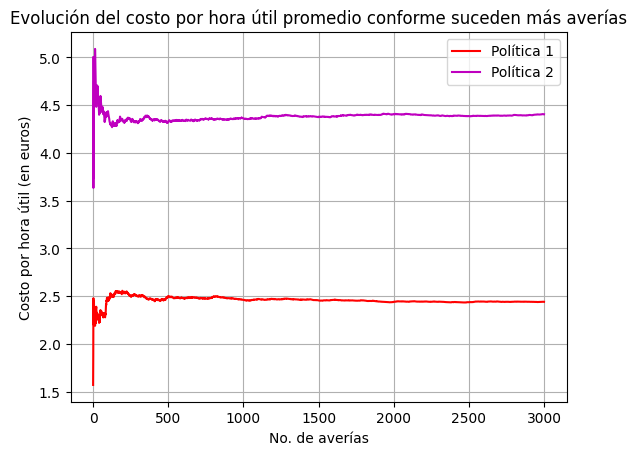

In [90]:
plt.plot(evol_prom_1, 'r')    # La gráficas muestran que la convergencia está garantizada con 1000 iteraciones para ambas políticas.
plt.plot(evol_prom_2, 'm')
plt.xlabel('No. de averías')    
plt.ylabel('Costo por hora útil (en euros)')
plt.grid(True)
plt.title('Evolución del costo por hora útil promedio conforme suceden más averías')
plt.legend(['Política 1', 'Política 2'])
plt.show()

In [91]:
n = 1000    # Definiendo tamaño de muestra (número de averías) "n" para cada experimento a simular en ambos casos.

In [92]:
print('1: mu =', np.mean(evol_prom_1), ', sigma =', np.std(evol_prom_1))
print('2: mu =', np.mean(evol_prom_2), ', sigma =', np.std(evol_prom_2))

1: mu = 2.4574229719502414 , sigma = 0.041178812198628206
2: mu = 4.380361221987229 , sigma = 0.05116117017725883


## **6. Repita el experimento $N$ veces.**

Primero, necesitamos determinar el número $N$ de veces necesarias que se debe simular el experimento para que la probabilidad estimada de que ocurra la observación deseada difiera de su valor verdadero en menos de $\epsilon$ con un nivel de confianza del $(1 − \alpha)\%$.

Este número $N$ está dado por

  \begin{align}
  N > \left( \frac{2 \sigma Z_{\alpha/2}}{\epsilon} \right)^2
  \end{align}

Implementamos el siguiente código:

In [93]:
epsilon = 0.01    # Establecer la cota superior epsilon para el error del costo promedio estimado.
alpha = 0.05      # Indicar el grado de significancia que tendrá el valor establecido para epsilon.

In [94]:
N_1 = int(np.ceil((2*np.std(evol_prom_1)*norm.ppf(1-alpha/2)/epsilon)**2))    # Cálculo del número de simulaciones del experimento
N_2 = int(np.ceil((2*np.std(evol_prom_2)*norm.ppf(1-alpha/2)/epsilon)**2))    #necesarias para ambas políticas 1 y 2.
print(N_1)
print(N_2)

261
403


In [95]:
def simulacion(N, p):                  # Función que devuelve una lista con los promedios de los costos promedio estimados de los N
  prom = []                            #experimentos realizados para el caso indicado con "p".
  for i in range(N):
    evol_prom = experimento(n, p)
    prom.append(np.mean(evol_prom))
  return prom

In [96]:
prom_1 = simulacion(N_1, 1)    # Realizamos la simulación para cada caso.
prom_2 = simulacion(N_2, 2)

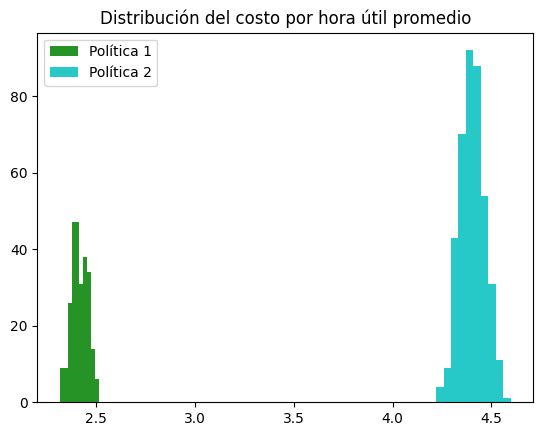

In [97]:
plt.hist(prom_1, color = 'g', alpha = 0.85)    # Las gráficas nos sugieren que las distribuciones de los costos promedio
plt.hist(prom_2, color = 'c', alpha = 0.85)    #aparentemente son normales.
plt.grid(False)
plt.legend(['Política 1' , 'Política 2'])
plt.title('Distribución del costo por hora útil promedio')
plt.show()

In [98]:
print('a: mu =', np.mean(prom_1), ', sigma =', np.std(prom_1))
print('b: mu =', np.mean(prom_2), ', sigma =', np.std(prom_2))

a: mu = 2.415232301431439 , sigma = 0.0410593621354426
b: mu = 4.403931038573729 , sigma = 0.06223921957388508


## **7. Hallamos el intervalo de confianza.**

Utilizamos la fórmula
  \begin{align}
  \bar{x} - Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}} < \mu < \bar{x} + Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}
  \end{align}

Implementamos el siguiente código:

In [99]:
mu_1 = np.mean(prom_1)                                           # Se presentan los intervalos de confianza para la media estimada en
li_1 = mu_1 - norm.ppf(1-alpha/2) * np.std(prom_1)/np.sqrt(n)    #cada política de la forma: 
ls_1 = mu_1 + norm.ppf(1-alpha/2) * np.std(prom_1)/np.sqrt(n)    #
print('1:', li_1, '<', mu_1, '<', ls_1)                          #       Caso: Límite inferior < Media estimada < Límite superior

mu_2 = np.mean(prom_2)
li_2 = mu_2 - norm.ppf(1-alpha/2) * np.std(prom_2)/np.sqrt(n)
ls_2 = mu_2 + norm.ppf(1-alpha/2) * np.std(prom_2)/np.sqrt(n)
print('2:', li_2, '<', mu_2, '<', ls_2)

1: 2.412687462563325 < 2.415232301431439 < 2.417777140299553
2: 4.400073482663088 < 4.403931038573729 < 4.40778859448437


# **Solución**

In [100]:
print('Si se consideran ' + str(n) + ' averías,\n')

print('Política 1: El costo por hora promedio por el funcionamiento de una máquina acorde a la primera política,')
print('estimada mediante simulación, es de ' + str(round(mu_1, 2)) + ' euros.\n')

print('Política 2: El costo por hora promedio por el funcionamiento de una máquina acorde a la segunda política,')
print('estimada mediante simulación, es de ' + str(round(mu_2, 2)) + ' euros.\n\n')

print('Por lo tanto, ', end='')
if mu_2 < mu_1:
  print('la nueva política (la segunda) debería ser implementada en cuanto antes, ya que genera costos menores que la actual.')
elif mu_2 == mu_1:
  print('es indiferente cuál política sea aplicada.')
else:
  print('la política actualmente implementada (la primera), deberá permanecer vigente, ya que genera costos menores que la nueva.')

Si se consideran 1000 averías,

Política 1: El costo por hora promedio por el funcionamiento de una máquina acorde a la primera política,
estimada mediante simulación, es de 2.42 euros.

Política 2: El costo por hora promedio por el funcionamiento de una máquina acorde a la segunda política,
estimada mediante simulación, es de 4.4 euros.


Por lo tanto, la política actualmente implementada (la primera), deberá permanecer vigente, ya que genera costos menores que la nueva.
